##### <span style="color:#483D8B; font-weight:bold;">Import Libraries</span>

In [1]:
import warnings

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import re
import preprocessor as p
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from spellchecker import SpellChecker
from symspellpy.symspellpy import SymSpell, Verbosity
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import warnings
import torch

In [185]:
from datasets import Dataset
from transformers import TrainingArguments
from transformers import Trainer
import evaluate
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers import RobertaTokenizer, RobertaForSequenceClassification, RobertaTokenizerFast

##### <span style="color:#483D8B; font-weight:bold;">Import Dataset</span>

In [8]:
path = r"C:\Users\User\Desktop\Ironhack_DA\Final-project-hate-speech-detection-with-NLP\Dataset-Hate-Speech-Detection.csv"

In [10]:
df = pd.read_csv(path, low_memory=False)

In [12]:
df

class                                              tweet
0          2  !!! RT @mayasolovely: As a woman you shouldn't...
1          1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2          1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3          1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4          1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...      ...                                                ...
24778      1  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779      2  you've gone and broke the wrong heart baby, an...
24780      1  young buck wanna eat!!.. dat nigguh like I ain...
24781      1              youu got wild bitches tellin you lies
24782      2  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[24783 rows x 2 columns]

Classification:

- 0 - Hate Speech
- 1 - Offensive Language
- 2 - Neither/Neutral content

In [15]:
df.shape

(24783, 2)

In [17]:
df.reset_index(drop=True, inplace=True)
df.index = df.index + 0

In [19]:
df.head(5)

class                                              tweet
0      2  !!! RT @mayasolovely: As a woman you shouldn't...
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   24783 non-null  int64 
 1   tweet   24783 non-null  object
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


In [23]:
df.isnull().sum()

class    0
tweet    0
dtype: int64

NOTE: no null values & consistent datatypes

##### <span style="color:#483D8B; font-weight:bold;">Cleaning tweet column</span>

In [27]:
from IPython.display import display
pd.set_option('display.max_colwidth', None)

In [29]:
display(df.iloc[:10, :2])

class  \
0      2   
1      1   
2      1   
3      1   
4      1   
5      1   
6      1   
7      1   
8      1   
9      1   

                                                                                                                                                            tweet  
0                    !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...  
1                                                                           !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!  
2                                        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit  
3                                                                                                  !!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny  
4                       !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;  
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"  
6                                                       !!!!!!"@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"  
7                                                              !!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;  
8                                                                                                      " &amp; you might not get ya bitch back &amp; thats that "  
9                                                                                                       " @rhythmixx_ :hobbies include: fighting Mariam"\n\nbitch

In [31]:
df[df['class'] == 0]

class  \
85         0   
89         0   
110        0   
184        0   
202        0   
...      ...   
24576      0   
24685      0   
24751      0   
24776      0   
24777      0   

                                                                                                                         tweet  
85                                                               "@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer" gaywad  
89                                         "@CB_Baby24: @white_thunduh alsarabsss" hes a beaner smh you can tell hes a mexican  
110    "@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn  
184      "@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPLE https://t.co/RNvD2nLCDR" This is why there's black people and niggers  
202                                                 "@NoChillPaz: "At least I'm not a nigger" http://t.co/RGJa7CfoiT"\n\nLmfao  
...                                                                                                                        ...  
24576                                                                                      this guy is the biggest faggot omfg  
24685               which one of these names is more offensive kike, wop, kraut, wetback jigaboo, towelhead, gook, or redskin.  
24751                                                                               you a pussy ass nigga and I know it nigga.  
24776                                                                                                       you're all niggers  
24777               you're such a retard i hope you get type 2 diabetes and die from a sugar rush you fucking faggot @Dare_ILK  

[1430 rows x 2 columns]

In [33]:
df.groupby('class').nunique()

tweet
class       
0       1430
1      19190
2       4163

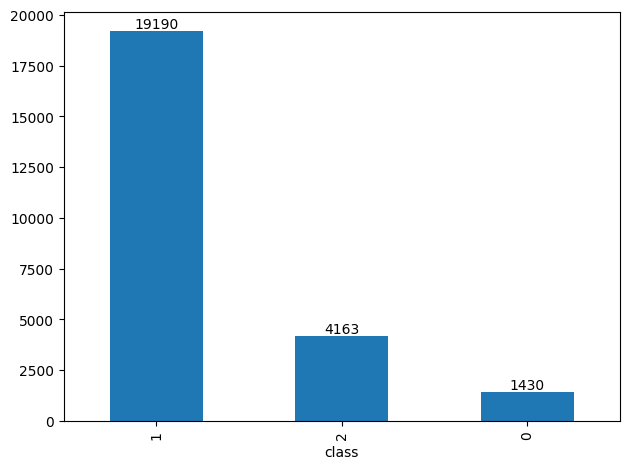

In [35]:
class_count = df['class'].value_counts()

ax = class_count.plot(kind='bar')

for i, value in enumerate(class_count):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [37]:
display(df.iloc[:5, :2])

class  \
0      2   
1      1   
2      1   
3      1   
4      1   

                                                                                                                                          tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...  
1                                                         !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!  
2                      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit  
3                                                                                !!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny  
4     !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
max_edit_distance_dictionary = 2
prefix_length = 7
sym_spell = SymSpell(max_edit_distance_dictionary, prefix_length)

dictionary_path = "frequency_dictionary_en_82_765.txt"  # path to the downloaded dictionary
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.EMOJI)

stop_words = set(stopwords.words('english'))
punctuation = string.punctuation
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

def correct_spelling_symspell(text):
    corrected_words = []
    for word in text.split():
        # Skip short words and stopwords to speed up
        if len(word) < 3 or word in stop_words:
            corrected_words.append(word)
            continue
        
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        if suggestions:
            corrected_words.append(suggestions[0].term)
        else:
            corrected_words.append(word)
    return " ".join(corrected_words)

def clean_tweet(text):
    text = p.clean(text)
    text = correct_spelling_symspell(text)
    pattern = r'([{}])\1+'.format(re.escape(punctuation))
    text = re.sub(pattern, r'\1', text)
    tokens = tokenizer.tokenize(text)
    words = [w for w in tokens if w not in stop_words]
    return " ".join(words)

df['tweet_cleaned'] = df['tweet'].apply(clean_tweet)

In [42]:
df['tweet_cleaned'] = df['tweet_cleaned'].str.replace(r'!\s*rt\s*:', '', regex=True).str.replace(r"[^\w\s.,!?']", "", regex=True)

In [43]:
df

class  \
0          2   
1          1   
2          1   
3          1   
4          1   
...      ...   
24778      1   
24779      2   
24780      1   
24781      1   
24782      2   

                                                                                                                                                    tweet  \
0            !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...   
1                                                                   !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!   
2                                !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit   
3                                                                                          !!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny   
4               !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;   
...                                                                                                                                                   ...   
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8230;. Now, mine? Bible scriptures and hymns&#8221;   
24779                                                                              you've gone and broke the wrong heart baby, and drove me redneck crazy   
24780                                                                                 young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again   
24781                                                                                                               youu got wild bitches tellin you lies   
24782                     ~~Ruffled | Ntac Eileen Dahlia - Beautiful color combination of pink, orange, yellow &amp; white. A Coll http://t.co/H0dYEBvnZB   

                                                                                     tweet_cleaned  
0                                       woman complain cleaning house camp man always take trash .  
1                                                   boy date cold.tyga bad coffin dat hoe st place  
2                                               ! rt dawg  ever fuck bitch start cry confused shit  
3                                                                                 look like granny  
4                                                  shit hear might true might faker bitch told ya   
...                                                                                            ...  
24778                                muthaf  lie   rights tl trash  . mine bible scriptures hymns   
24779                                              gone broke wrong heart baby drove redneck crazy  
24780                                      young buck wanna eat ! . dat nigga like int fucking dis  
24781                                                                got wild bitches telling lies  
24782   ruffled  tax eileen dahlia  beautiful color combination pink orange yellow camp white roll  

[24783 rows x 3 columns]

##### <span style="color:#483D8B; font-weight:bold;">Model bulding</span>

##### <span style="color:#483D8B; font-weight:bold;">1 - Handling Imbalanced Data</span>

In [46]:
df.groupby('class').nunique()

tweet  tweet_cleaned
class                      
0       1430           1389
1      19190          18728
2       4163           4090

In [47]:
df.drop('tweet', inplace = True, axis=1)

In [48]:
df = df.drop_duplicates(subset='tweet_cleaned', keep='first').reset_index(drop=True)

In [49]:
multi_class_tweets = df.groupby('tweet_cleaned')['class'].nunique()

tweets_with_multiple_classes = multi_class_tweets[multi_class_tweets > 1]

print(tweets_with_multiple_classes)

Series([], Name: class, dtype: int64)


In [57]:
df_0 = df[df['class'] == 0]   # All hate speech tweets
df_1 = df[df['class'] == 1]   # All offensive tweets
df_2 = df[df['class'] == 2]   # All neutral tweets

In [59]:
max_size = df_1.shape[0]
max_size 

#there are duplicate rows

18718

In [61]:
df.groupby('class').nunique()

tweet_cleaned
class               
0               1375
1              18718
2               4084

In [63]:
df_0_upsampled = resample(df_0, replace=True, n_samples=max_size, random_state=42)
df_2_upsampled = resample(df_2, replace=True, n_samples=max_size, random_state=42)

In [65]:
df_balanced = pd.concat([df_0_upsampled, df_2_upsampled, df_1])

In [67]:
df_balanced.groupby('class').count()

tweet_cleaned
class               
0              18718
1              18718
2              18718

In [69]:
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [71]:
df_balanced.groupby('class').count()

tweet_cleaned
class               
0              18718
1              18718
2              18718

In [173]:
df_balanced.head(2)

class  \
0      1   
1      2   

                                                                                                    tweet_cleaned  \
0                                                             lied hurt like bitch bruises army would suggest low   
1  french word potato translates earth apple banana long yellow tree apple submarines big wet hollow kaboom apple   

   char_length  
0           51  
1          110

In [175]:
df_balanced["char_length"] = df_balanced["tweet_cleaned"].apply(len)
print(df_balanced["char_length"].describe())

count    56154.000000
mean        49.102913
std         25.213088
min          0.000000
25%         28.000000
50%         46.000000
75%         68.000000
max        146.000000
Name: char_length, dtype: float64


##### <span style="color:#483D8B; font-weight:bold;">2 - RoBERTa model bulding</span>

Using a lighter version or Roberta, distilroberta-base

In [207]:
df_reduced = df_balanced.groupby('class', group_keys=False).apply(lambda x: x.sample(frac=0.7, random_state=42)).reset_index(drop=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16328\230380063.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_reduced = df_balanced.groupby('class', group_keys=False).apply(lambda x: x.sample(frac=0.7, random_state=42)).reset_index(drop=True)


In [217]:
df_reduced = df_reduced.drop(columns=['char_length'])

In [219]:
df_reduced.groupby('class').count()

tweet_cleaned
class               
0              13103
1              13103
2              13103

In [221]:
X = df_reduced["tweet_cleaned"]
y = df_reduced["class"]

In [223]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [225]:
tokenizer = RobertaTokenizerFast.from_pretrained("distilroberta-base")

In [227]:
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=150) # changed the length (actuals length 147)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=150)

In [229]:
#train_encodings

In [231]:
class TweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.reset_index(drop=True)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx])
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, y_train)
test_dataset = TweetDataset(test_encodings, y_test)

In [233]:
model = RobertaForSequenceClassification.from_pretrained("distilroberta-base", num_labels=3)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [235]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=20,
    per_device_eval_batch_size=20,
    logging_dir='./logs',
    logging_steps=1000,
    no_cuda=True  # to force CPU usage if needed
)

C:\Users\User\Desktop\Ironhack_DA\Final-project-hate-speech-detection-with-NLP\myfinalproject\Lib\site-packages\transformers\training_args.py:1577: FutureWarning: using `no_cuda` is deprecated and will be removed in version 5.0 of 🤗 Transformers. Use `use_cpu` instead
  warnings.warn(


In [237]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

In [239]:
trainer.train()

KeyboardInterrupt: 

##### <span style="color:#483D8B; font-weight:bold;">2 - BERT model bulding</span>